Problem a
beta0 = 32.142711644500494, beta1 = -0.3188642859705657
Problem d
beta0 beta1 beta2 are: 
[[-20.36081647]
 [ 14.34441037]
 [ -0.3045853 ]]
R-square:  0.8200728991486963


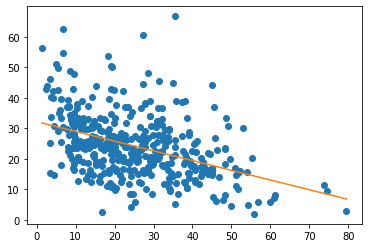

In [26]:
%matplotlib inline  
 
import csv
import numpy as np
import matplotlib.pyplot as plt
import math


# y = ax + b
def Question_a(x,y):
    print('Problem a')
    xbar = np.mean(x)
    ybar = np.mean(y)

    dx = x - xbar
    dy = y - ybar

    a = np.sum(dx*dy) / np.sum(dx*dx)
    b = ybar - a*xbar
    print('beta0 = {}, beta1 = {}'.format(b,a))
    X = np.arange(np.min(x), np.max(x), 0.1)
    Y = a*X+b
    plt.plot(X,Y)

    #plt.show()

def Question_d(x1,x2,y):
    print('Problem d')
    X0 = np.array([1]*len(x1))
    X0 = X0[:,np.newaxis]
    X1 = x1[:,np.newaxis]
    X2 = x2[:,np.newaxis]
    #print(X0.shape)
    #print(X1.shape)
    #print(X2.shape)
    X = np.hstack( [X0,X1,X2] )
    #print(X.shape)
    Y = y[:, np.newaxis]
    #print(Y.shape)
    B = np.linalg.inv( np.dot(X.T,X) ).dot(X.T)
    #print(B.shape)
    B=B.dot(Y)
    #print(B.shape)
    print('beta0 beta1 beta2 are: ')
    print(B)

    ybar = np.mean(y)
    
    SSres = np.sum( (X.dot(B)-ybar)*(X.dot(B)-ybar) ) 
    SStot = np.sum( (y-ybar)*(y-ybar) )
    print("R-square: ", 1-SSres/SStot)



if __name__ == "__main__":
    with open('MEAP93.csv', newline='') as csvfile:
        # 讀取 CSV 檔內容，將每一列轉成一個 dictionary
        rows = csv.DictReader(csvfile)

        mathten = []
        lnchprg = []
        log_expend = []
        for row in rows:
            mathten.append(float(row['math10']))
            lnchprg.append(float(row['lnchprg']))
            log_expend.append(math.log(float(row['expend']),10))

    plt.plot(lnchprg,mathten,'o')

    x2 = np.array(lnchprg)
    x1 = np.array(log_expend)
    y = np.array(mathten)
    Question_a(x2,y)
    Question_d(x1,x2,y)

# from scipy import stats
# slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# plt.plot(x, y, 'o', label='original data')
# plt.plot(x, intercept + slope*x, 'r', label='fitted line')

